In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition/')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('./data.csv')
data.head(3)

,Files,labels,Frequency,Audio_length,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,22050.0,1.70,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,22050.0,1.79,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,22050.0,2.62,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
Files               582 non-null object
labels              582 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 63.7+ KB


In [0]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 581
Data columns (total 14 columns):
Files               556 non-null object
labels              556 non-null int64
Frequency           556 non-null float64
Audio_length        556 non-null float64
zcr_mean            556 non-null float64
sp_cen_mean         556 non-null float64
sp_rf_mean          556 non-null float64
mfcc_mean           556 non-null float64
spec_bw_mean        556 non-null float64
rmse_mean           556 non-null float64
chroma_stft_mean    556 non-null float64
Chromagram          556 non-null float64
MelSpectrohram      556 non-null float64
Amplitude_db        556 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 65.2+ KB


In [12]:
data2 = data.drop(['Audio_length','Frequency'],axis=1)
data2.head(3)

,Files,labels,zcr_mean,sp_cen_mean,sp_rf_mean,mfcc_mean,spec_bw_mean,rmse_mean,chroma_stft_mean,Chromagram,MelSpectrohram,Amplitude_db
0,Copy of PTT-20190716-WA0040.wav,1,0.095385,1557.936608,2977.110827,-21.310974,1446.468570,0.007986,0.461959,0.276743,0.042042,-45.591785
1,Copy of PTT-20190716-WA0041.wav,1,0.115664,1774.966989,3151.163424,-14.459980,1608.826526,0.036079,0.299946,0.260970,0.822725,-30.595629
2,Copy of PTT-20190716-WA0042.wav,1,0.117430,1853.480595,3594.329888,-15.858596,1635.967540,0.018241,0.338664,0.271582,0.203850,-36.165131


In [13]:
X = data2.iloc[:,2:]
X.keys()

Index(['zcr_mean', 'sp_cen_mean', 'sp_rf_mean', 'mfcc_mean', 'spec_bw_mean',
       'rmse_mean', 'chroma_stft_mean', 'Chromagram', 'MelSpectrohram',
       'Amplitude_db'],
      dtype='object')

In [0]:
Y = data2.labels


In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rf_model = rmf.fit(x_train,y_train)
rf_model

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
rf_y_pred = rf_model.predict(x_test)
rf_y_pred


array([1, 2, 3, 4, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 4, 1, 3, 2, 2, 2, 4, 1,
       2, 2, 2, 2, 3, 2, 4, 4, 1, 3, 4, 2, 4, 2, 2, 3, 2, 2, 2, 1, 2, 4,
       2, 3, 3, 2, 2, 2, 4, 2, 4, 3, 3, 4, 2, 4, 4, 1, 4, 2, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 1, 1, 4, 4, 4, 3, 2, 1, 3, 1, 2, 4, 2, 4, 1, 4, 4,
       4, 4, 1, 2, 1, 2, 2, 1, 4, 4, 2, 1, 4, 1, 2, 4, 2, 3, 3, 2, 2, 2,
       1, 4])

In [0]:
rf_y_prob = rf_model.predict_proba(x_test)

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_curve, auc, classification_report,cohen_kappa_score

In [22]:
accuracy_score(rf_y_pred,y_test)

0.5089285714285714

## Classification Report

In [23]:
rf_cm = classification_report(y_test,rf_y_pred)
print(rf_cm)


              precision    recall  f1-score   support

           1       0.33      0.26      0.29        23
           2       0.56      0.83      0.67        29
           3       0.79      0.41      0.54        27
           4       0.43      0.48      0.46        33

    accuracy                           0.51       112
   macro avg       0.53      0.50      0.49       112
weighted avg       0.53      0.51      0.50       112



### Precision:
- Precision is the fraction of predicted positives events that are actually positive
### Recall:
- Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly
### f1-score:
- The f1 score is the harmonic mean of recall and precision, with a higher score as a better model.

### OneHotEncoding : 
- A one hot encoding is a representation of categorical variables as binary vectors.
- This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [25]:
y_test = np.array(y_test).reshape(-1,1)
y_test.shape

(112, 1)

In [26]:
y_true_ohe = ohe.fit_transform(y_test).toarray()
y_true_ohe

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],


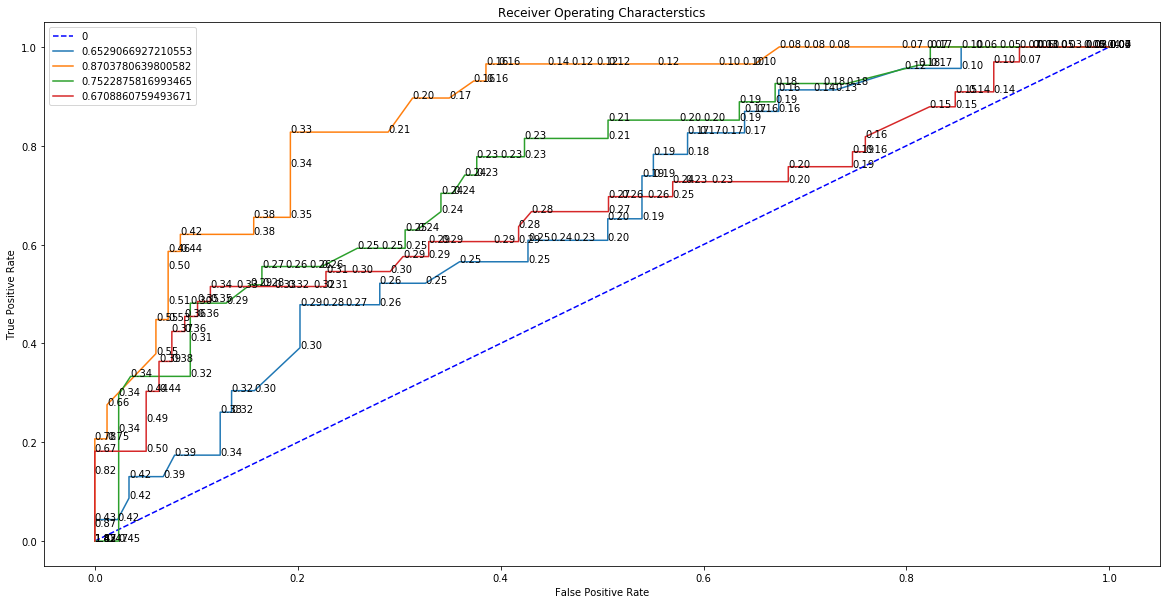

In [27]:
plt.figure(figsize=(20,10))
plt.plot([0,1],[0,1],'b--')
area = [0]

for i in range(4):

    y_true_1 = y_true_ohe[:,i:i+1]
    rf_y_prob_1 = rf_y_prob[:,i:i+1]
    fpr, trp, thereshold = roc_curve(y_true_1,rf_y_prob_1)
    area.append(auc(fpr,trp))
    for j in range(len(fpr)):

        plt.text(fpr[j],trp[j],'%0.2f'%thereshold[j])
        
     
    plt.plot(fpr,trp)
    

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.legend(['Base Line','Others','Bagunava','Namaskaram','Swagatham'])
plt.legend(area)
plt.show()

### Kappa Score

In [39]:
cohen_kappa_score(y_test,rf_y_pred)

0.3364928909952606

#### From the above kappa value 0.336, is very less to1, so we conclude that model is not good

# AdaBoost

In [0]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [0]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

In [31]:
ada_result = model_selection.cross_val_score(rf_model,x_train,y_train,cv=kfold)
print(ada_result)
print(kfold)

[0.51111111 0.44444444 0.48888889 0.44444444 0.47727273 0.36363636
 0.38636364 0.54545455 0.56818182 0.43181818]
KFold(n_splits=10, random_state=7, shuffle=False)


In [32]:
print(ada_result.mean())

0.46616161616161617


### AdaBoost by using sklearn

In [0]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
adamodel = AdaBoostClassifier(n_estimators=num_trees, random_state=7)

In [34]:
ada_model = adamodel.fit(x_train,y_train)
ada_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=7)

In [0]:
ada_y_pred = ada_model.predict(x_test)

In [36]:
ada_cm = metrics.confusion_matrix(y_test,ada_y_pred)
ada_cm

array([[ 8,  4,  7,  4],
       [ 3, 17,  5,  4],
       [ 6,  0, 12,  9],
       [ 4,  2, 24,  3]])

In [37]:
accuracy_score(y_test,ada_y_pred)

0.35714285714285715

### Kappa score

In [38]:
cohen_kappa_score(y_test, ada_y_pred)

0.14558169103623642

#### From the above kappa value 0.145, is very less to1, so we conclude that model is Bad